# Ds105_gary_Test

# 1) import libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from pywaffle import Waffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'


# 2)read a csv file

In [2]:
df_set = pd.read_csv(r'C:\Users\garyh\Downloads\healthcare-dataset-stroke-data.csv')
df_set.head()
df_set.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

# 3) clean the dataset

3a)fill na on important columns

as you can see that bmi have 1 null, i do filling the null value of bmi

In [3]:
a = df_set['bmi'].describe()[2]
df_set['bmi'] = df_set['bmi'].fillna(a)
df_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 3a) create a data to use for  analysis and modelling

In [4]:
data = df_set.copy()

threshold = 0.7
data = data[data.columns[data.isnull().mean()<threshold]]
data = data.loc[data.isnull().mean(axis=1)<threshold]
#filling all missing values with 0 
data = data.fillna(0)
#filling missing values with medians of the columns
data = data.fillna(data.median())
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,7.854067,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,7.854067,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [5]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 3b) create a dataframe to concat the columns

In [6]:
# i change the columns into categorical
dgender = pd.get_dummies(data['gender'])
df_concat = pd.concat([data,dgender], axis=1)

demarried = pd.get_dummies(data['ever_married'])
df_concat = pd.concat([data,demarried],axis=1)

dworkT = pd.get_dummies(data['work_type'])
df_concat = pd.concat([data,dworkT],axis=1)

df_concat.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,7.854067,never smoked,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0,0,1,0


insights

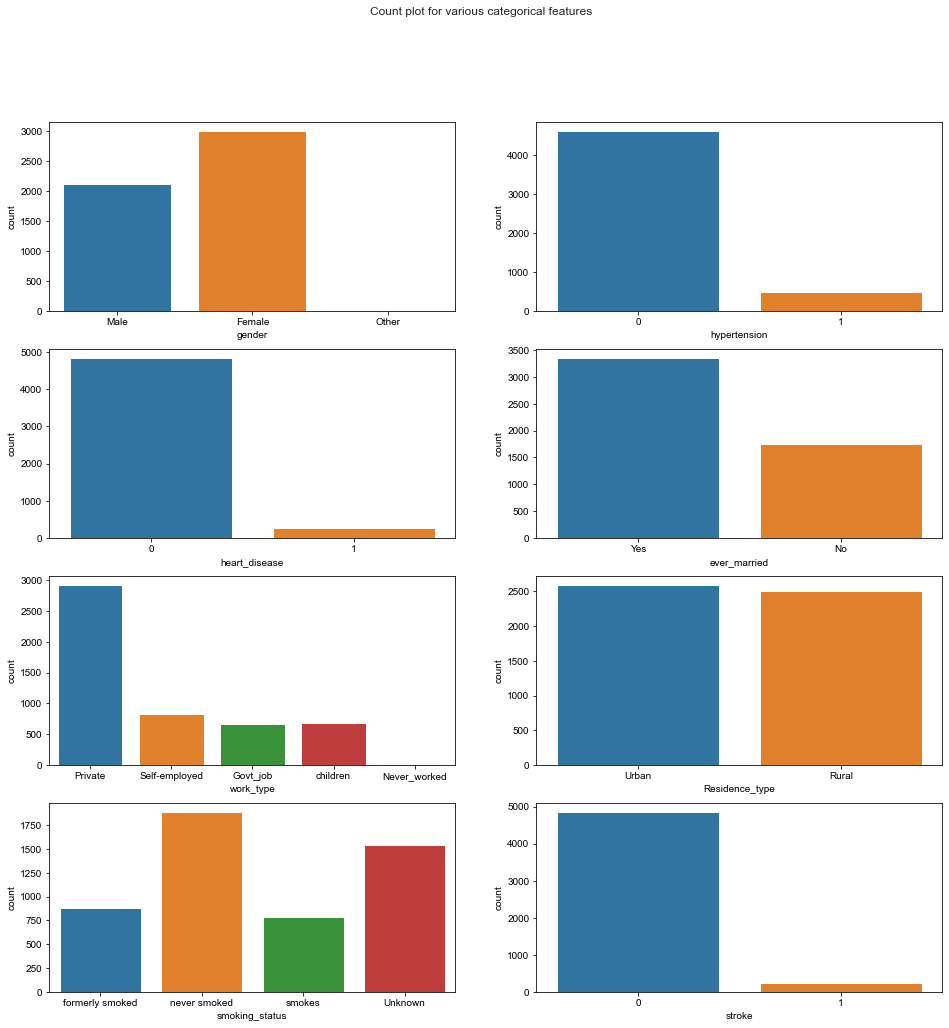

In [7]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df_concat,x='gender')
sns.countplot(ax=axes[0,1],data=df_concat,x='hypertension')
sns.countplot(ax=axes[1,0],data=df_concat,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df_concat,x='ever_married')
sns.countplot(ax=axes[2,0],data=df_concat,x='work_type')
sns.countplot(ax=axes[2,1],data=df_concat,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df_concat,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df_concat,x='stroke')

plt.show()

# 4) DATA PROCCESSING

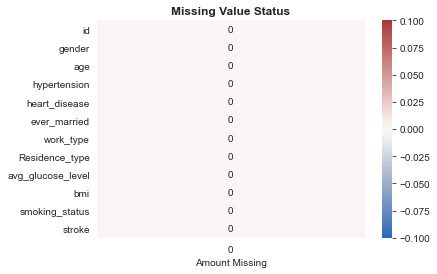

In [8]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

From distribution it is clear that every 4.9percent out of 100 people are having strokes from ths sampling data. 
Moreover,this is a highly unbalanced data distribution, and null accuracy score of this distribution it self is 95.1%, 
whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. 
So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

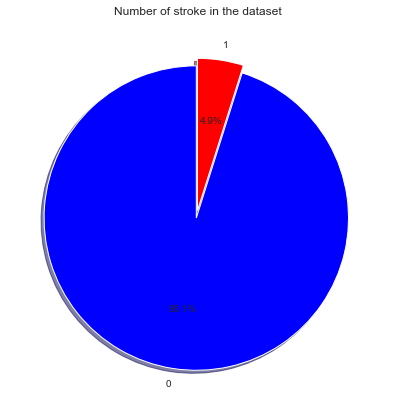

In [9]:
labels = data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["blue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [10]:
del data['id']

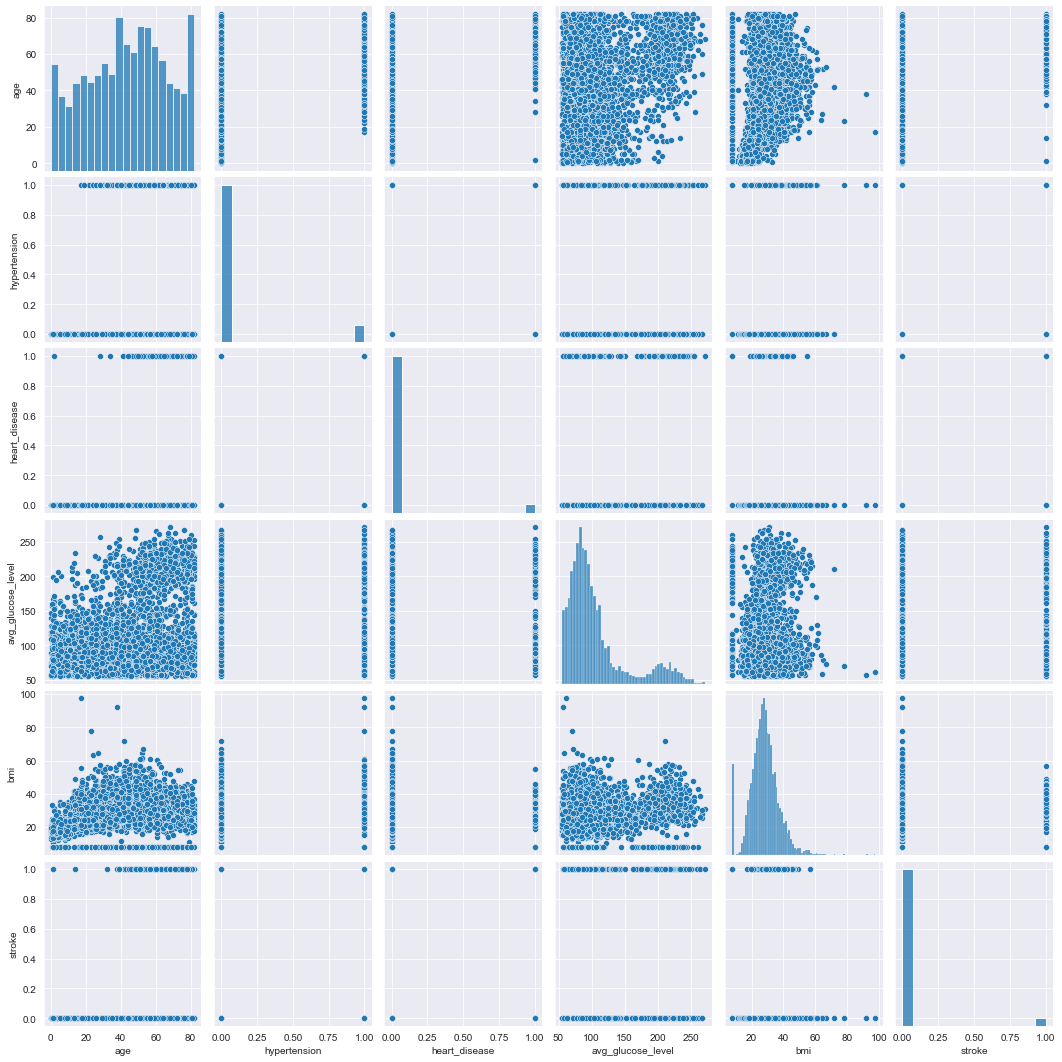

In [11]:
sns.pairplot(data)
plt.show()

create a correlation matric

In [12]:
corr_data = data.corr()

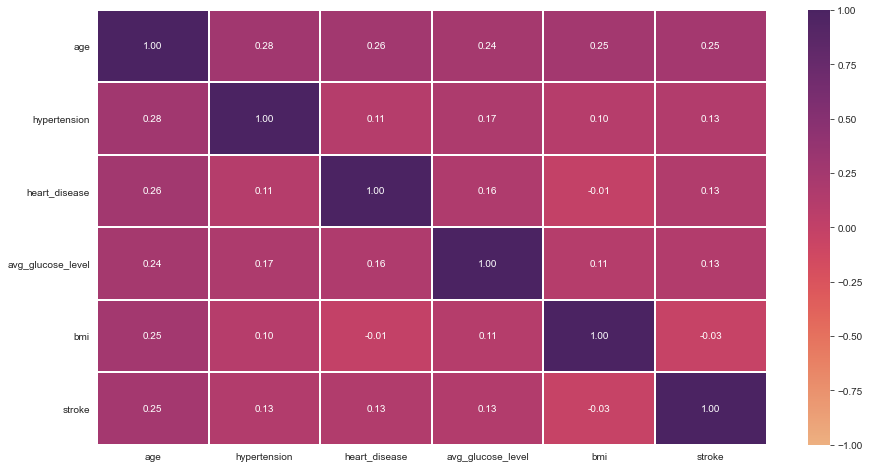

In [13]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr,cmap = 'flare',annot=True,fmt=".2f",vmin=-1,vmax=1,linewidths=0.2)
plt.show()

calculate stroke 1 if the patient had a stroke or 0 if not

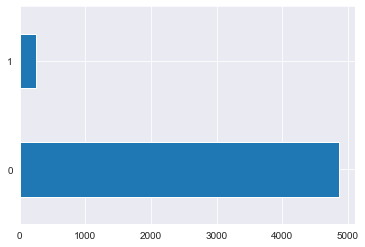

In [14]:
data["stroke"].value_counts().plot.barh()
plt.show()

# 5)which company has stroke from least to highest

In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,7.854067,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,7.854067,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [16]:
data['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

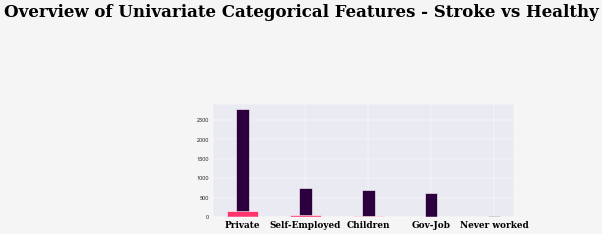

In [17]:
fig = plt.figure(figsize = (15,15),dpi = 40)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)
ax2 = fig.add_subplot(gs[0,1:])
fig.patch.set_facecolor('#f5f5f5')

axes = ax2
title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

healthy_gen = data[data['stroke'] == 0].work_type.value_counts()
stroke_gen = data[data['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)
fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
plt.show()

as shown above that in private secter and self employed person have more people having stroke

govt_job have a least stroke compare to the top 2 sector

children and never work are not very likely to get a stroke

this can explain that top sector have more stress and pressure then the other sector

In [18]:
def get_100_percent_stacked_bar_chart(column, width = 0.5): 
    # Get the count of records by column and stroke 
    data_breakdown = data.groupby([column, 'stroke'])['age'].count() 
    # Get the count of records by gender 
    data_total = data.groupby([column])['age'].count() 
    # Get the percentage for 100% stacked bar chart 
    data_pct = data_breakdown / data_total * 100 
    # Create proper DataFrame's format df_pct = df_pct.unstack() 
    return data_pct.plot.bar(stacked=True, figsize=(6,6), width=width)

In [19]:
data_type = data.groupby(['work_type'])[['age']].agg(['count','mean'])

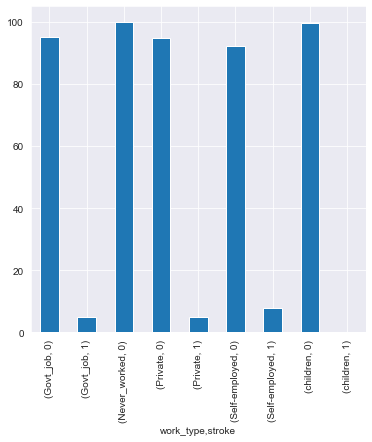

In [20]:
get_100_percent_stacked_bar_chart('work_type')
plt.show()

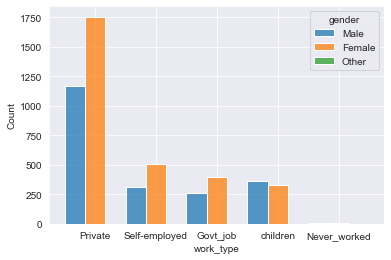

In [21]:
sns.histplot(x='work_type',hue='gender',data=data,bins=5,multiple='dodge')
plt.show()

# 6)Does smoker have high stroke rate compare to non smokers?

i plot in smoking status, keep the 'unknown' observations, by doing this I treat smokers and non smokers 
as a one class, which would be alright if our variable is not important.
#smoking is not good for health

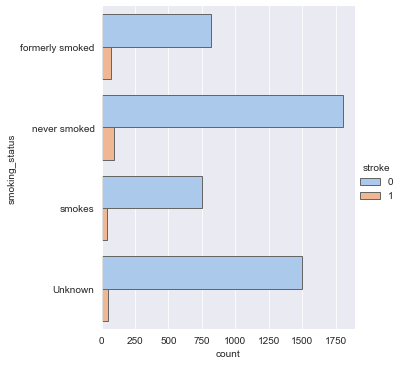

In [22]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".4",
            data=data)
plt.show()

as compared to smokers it seems that is not highly correlated.

# 7)Does urban or rural in resident type has high stroke rate?

<Figure size 1224x504 with 0 Axes>

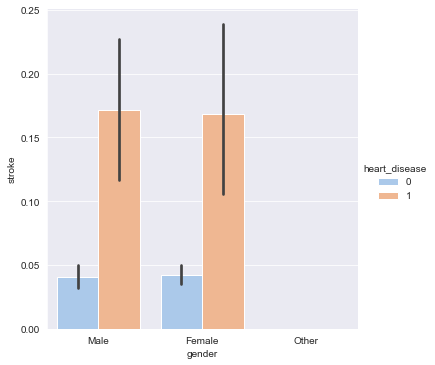

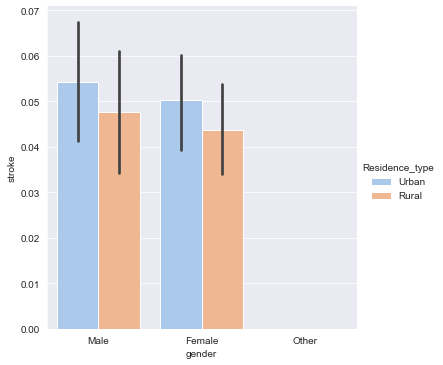

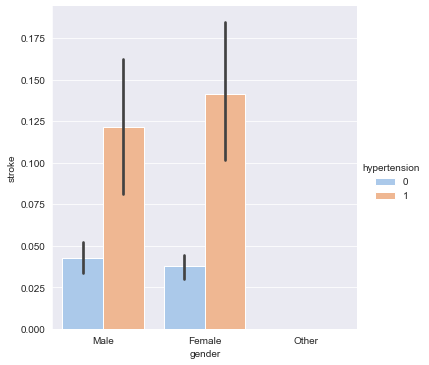

In [23]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=data)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=data)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=data)
plt.show()

Insight: Regardless of patient’s gender, and where they stayed, they have the same likelihood to experience stroke
the gender is not a feature that descriminate a person having a stroke or not
Hypertension and heart disease features are correlated to stroke

In [24]:
data.groupby(["gender","stroke"])["stroke"].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

Seems no main difference according to gender to pridict stroke

In [25]:
stroke_male=data[(data["gender"]=="Male")&(data["stroke"]==1)]["gender"].count()/data[data["gender"]=="Male"]["gender"].count()
stroke_female=data[(data["gender"]=="Female")&(data["stroke"]==1)]["gender"].count()/data[data["gender"]=="Female"]["gender"].count()

print("Stroke Male Rate: ",'{:,.2%}'.format(stroke_male))
print("Stroke Female Rate: ",'{:,.2%}'.format(stroke_female))

Stroke Male Rate:  5.11%
Stroke Female Rate:  4.71%


Slight difference between Male and Female in term of Age average

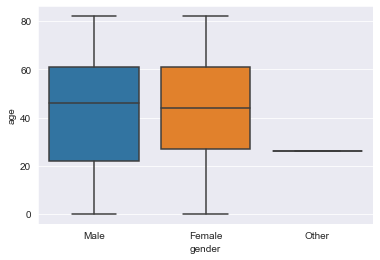

In [26]:
sns.boxplot(x='gender',y='age',data=data)
plt.show()

# 8) use label encoder to transform columns

In [27]:
# Using Lable encoding
labelEncoded = LabelEncoder()
data['smoking_status'] = labelEncoded.fit_transform(data['smoking_status'])
data['Residence_type'] = labelEncoded.fit_transform(data['Residence_type'])
data['work_type'] = labelEncoded.fit_transform(data['work_type'])
data['ever_married'] = labelEncoded.fit_transform(data['ever_married'])
data['gender'] = labelEncoded.fit_transform(data['gender'])


data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,7.854067,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,7.854067,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [28]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

# 9)What is the density of the bmi, age and  Level of serum creatinine in the blood (mg/dL)


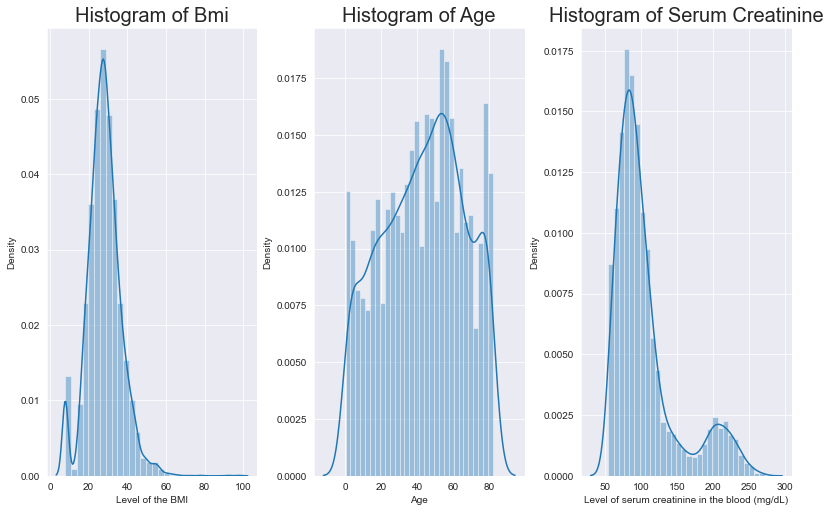

In [29]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(data.bmi, title='Bmi', xlabel="Level of the BMI", ax=axes[0])

plot_hist(data.age, bins=30, title='Age', xlabel='Age', ax=axes[1])

# milligrams/decilitre, Scale factor: 0.01
plot_hist(data.avg_glucose_level, title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])


Insight --
Based on the above plots, it seems clear that Age is a big factor
in stroke patients - the older you get the more at risk you are.
there are also differences in Avg. Glucose Levels and BMI.

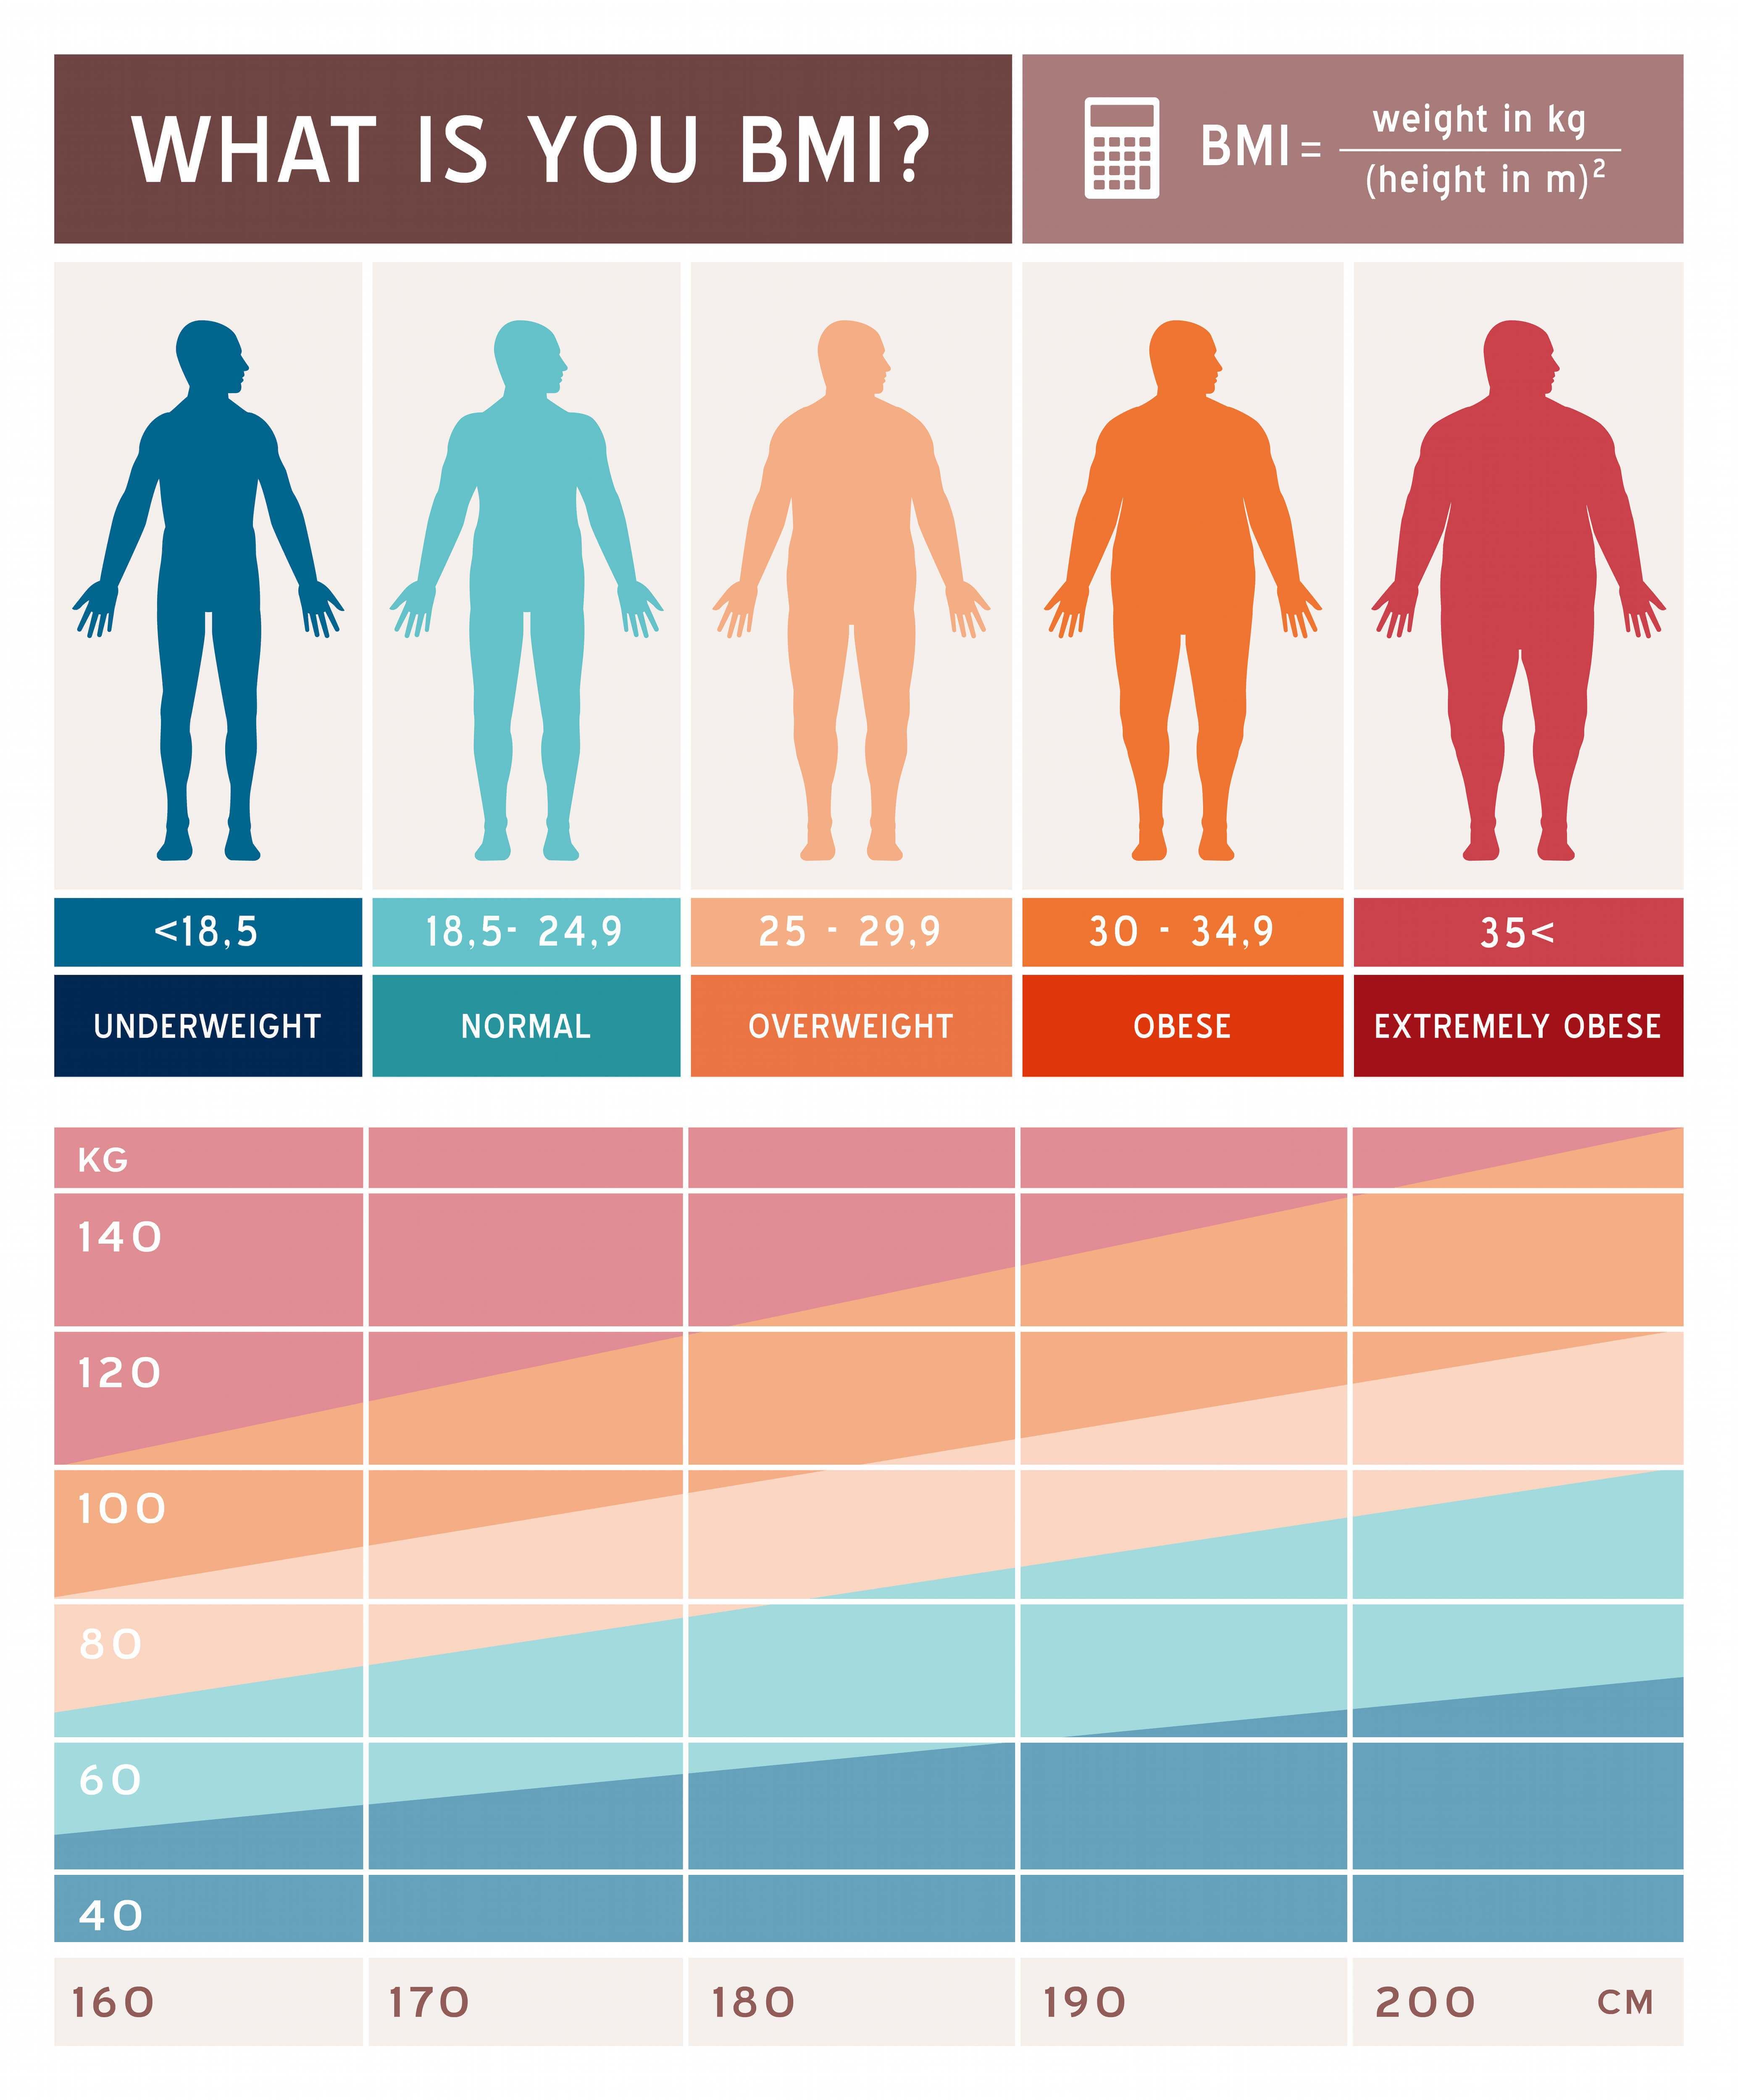

# 10)Does age has impact on strokes? and How is this parameter distributed?

It is obvious that older age people are more exposed to the risk of stroke

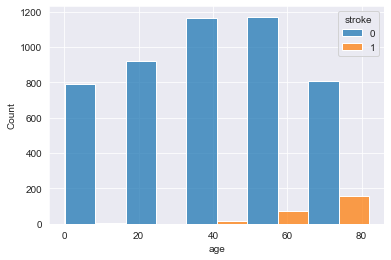

In [30]:
sns.histplot(x= 'age',hue='stroke',data=data,bins=5,multiple='dodge')
plt.show()

<!-- feature the age group and proportion 
where 1 is range 18< to <=30,
where 2 is range 30< to <= 40,
where 3 is 40< to <=50,
where 4 is 50< to <=60,
where 5 is 60< to <=85 -->

In [31]:
# feature the age group and proportion 
# where 1 is range 18< to <=30,
#where 2 is range 30< to <= 40,
# where 3 is 40< to <=50,
# where 4 is 50< to <=60,
# where 5 is 60< to <=85
def age_split(col):
    age = col
    if age<=18 :
        return '1'
    elif 18<age<=30 :
        return '2'
    elif 30<age<=40 :
        return '3'    
    elif 40<age<=50 :
        return '4'
    elif 50<age<=60 :
        return '5'
    elif 60<age<=85:
        return '6'

0 is refer to no stroke and 1 is stroke

In [32]:
data['Age_group'] = data['age'].apply(age_split)
age1 = pd.DataFrame(data.groupby('Age_group')['stroke'].value_counts())
age1['proportion'] = round(age1['stroke']/data.groupby('Age_group')['age'].count(),4)
age1

stroke  proportion
Age_group stroke                    
1         0          914      0.9978
          1            2      0.0022
2         0          654      1.0000
3         0          668      0.9911
          1            6      0.0089
4         0          724      0.9797
          1           15      0.0203
5         0          774      0.9405
          1           49      0.0595
6         0         1127      0.8643
          1          177      0.1357

plot the proportion,
According to the Data, out of 100 person older than 60 year
approx 14 had a stroke

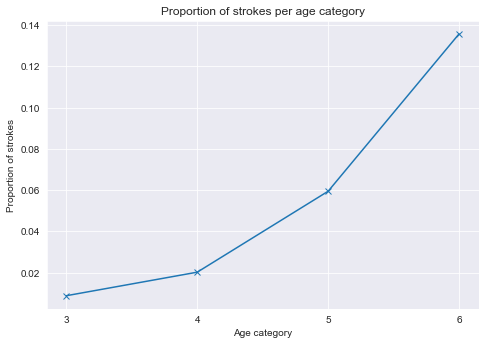

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(['3','4','5','6'],age1[(age1.index.get_level_values(1)==1)&(age1.index.get_level_values(0)!='1')]['proportion'],
        marker='x')
plt.xlabel('Age category')
plt.ylabel('Proportion of strokes')
plt.title('Proportion of strokes per age category')
plt.show()

# 10)what is the Correlation with avg glucose level

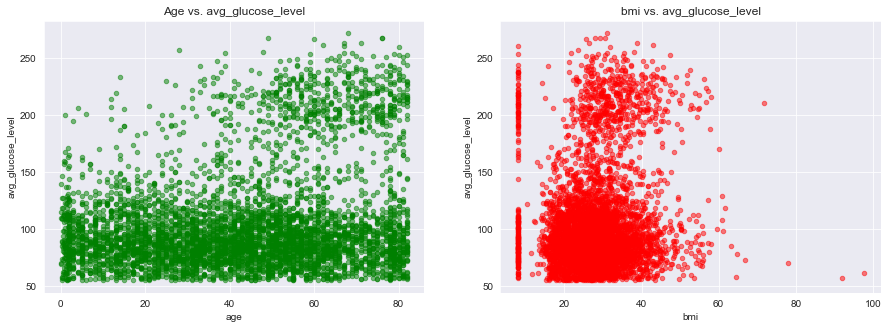

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

Avg glucose level is high with old people
BMI >40 have low avg glucose

In [35]:
data['agebin'] = pd.cut(data.age,bins=3,labels=range
(1, 4), retbins=False,include_lowest=True)
data['agebin']=data['agebin'].astype(int)
data.groupby(["agebin","stroke"])["age"].count()

agebin  stroke
1       0         1408
        1            2
2       0         1886
        1           35
3       0         1567
        1          212
Name: age, dtype: int64

binding age is more accurate,0 is refer to no stroke and 1 is stroke

# 11) Can we predict stroke before it happens for better preventive healthcare!

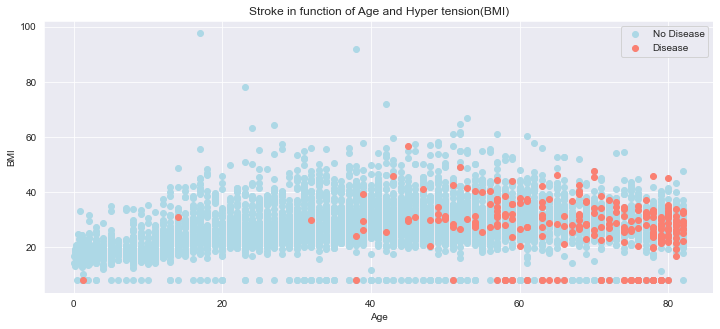

In [36]:
plt.figure(figsize=(12,5))

# Start with positve examples
plt.scatter(data.age[data.stroke==0], 
            data.bmi[data.stroke==0], 
            c="lightblue") # define it as a scatter figure

# do a negative examples which needed on the same plot, so can plt again
plt.scatter(data.age[data.stroke==1], 
            data.bmi[data.stroke==1], 
            c="salmon") # axis always come as (x, y)

# Add some helpful information
plt.title("Stroke in function of Age and Hyper tension(BMI)")
plt.xlabel("Age")
plt.legend(["No Disease", "Disease"])
plt.ylabel("BMI")

plt.savefig('stroke_predict_hyper_tension.png')
plt.show()
#bmi looks effective

In [37]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

In [38]:
def label_encoder(data):
    for i in cat_cols:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
    return data

In [39]:
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_group,agebin
0,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,0.979120,1,5,3
1,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,-2.318821,2,5,3
2,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,0.508739,2,5,3
3,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,0.726720,3,3,2
4,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-0.466443,2,5,3
5,1,1.670617,-0.328602,-0.238947,1,2,1,1.768195,0.107193,1,5,3
6,1,1.361026,3.043196,4.185032,1,2,0,-0.796342,-0.076370,2,5,3
7,0,1.139889,-0.328602,-0.238947,0,2,1,-0.259671,-0.604116,2,5,3
8,0,0.697615,-0.328602,-0.238947,1,2,0,-0.662506,-2.318821,0,4,3
9,0,1.537935,-0.328602,-0.238947,1,2,1,-1.050764,-0.443497,0,5,3


# Stroke or not in Categorical Features

In [40]:
categorical_data = data[['gender','Residence_type','smoking_status','stroke']]
summarize = pd.concat([pd.crosstab(categorical_data[x],categorical_data.stroke) 
for x in categorical_data.columns[:-1]], keys=categorical_data.columns[:-1])
summarize


stroke               0    1
gender         0  2853  141
               1  2007  108
               2     1    0
Residence_type 0  2400  114
               1  2461  135
smoking_status 0  1497   47
               1   815   70
               2  1802   90
               3   747   42

# Classification Models

i will be trying 5 modeling:KNN, Logistic Regression, Random Forest Classifier, XGBClassifier, LGBMClasifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

In [42]:
results = pd.DataFrame(columns = ['KNN', 'LR', 'RF', 'XGB', 'LGBM'], index = range(4))

# SVC MODEL

In [44]:
svc = SVC(random_state = 22, probability = True)
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
svc_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       967
           1       0.17      0.55      0.26        55

    accuracy                           0.83      1022
   macro avg       0.57      0.70      0.58      1022
weighted avg       0.93      0.83      0.87      1022

ROC AUC score: 0.816

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.928
precision: 0.84
recall: 0.89
f1: 0.87


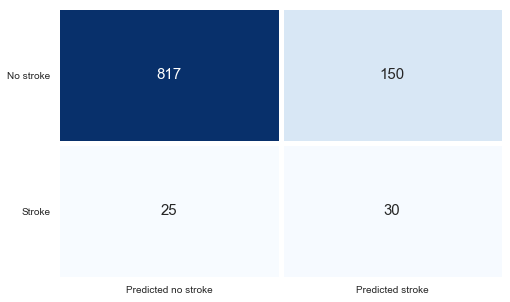

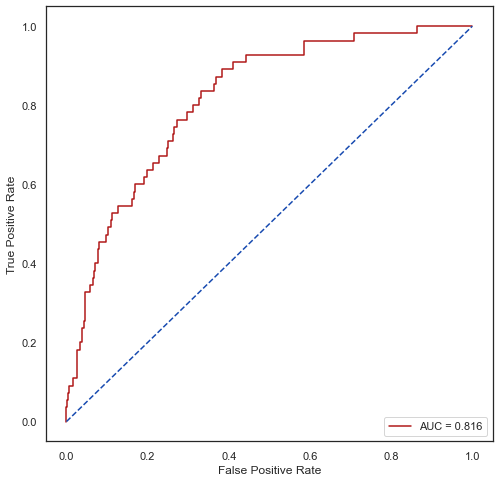

In [45]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN MODEL

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
knn_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('*******************************************')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

#accuracy is a poor choice of metric for imbalanced datasets
#A better way is to have a weighted f1 score with much 
#more weight on recall than precision, precision and recall works hand in hand
#due to their relationship on their tresholding

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       967
           1       0.16      0.53      0.25        55

    accuracy                           0.83      1022
   macro avg       0.57      0.69      0.58      1022
weighted avg       0.93      0.83      0.87      1022

ROC AUC score: 0.711

*******************************************

Cross-validation scores with 5 folds:

ROC AUC: 0.954
precision: 0.84
recall: 0.98
f1: 0.9


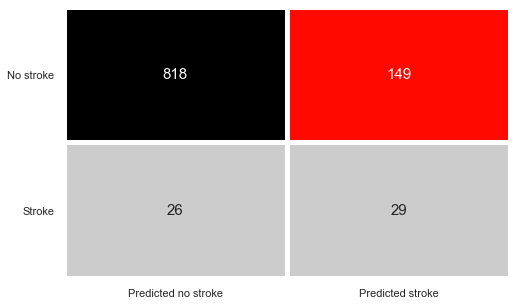

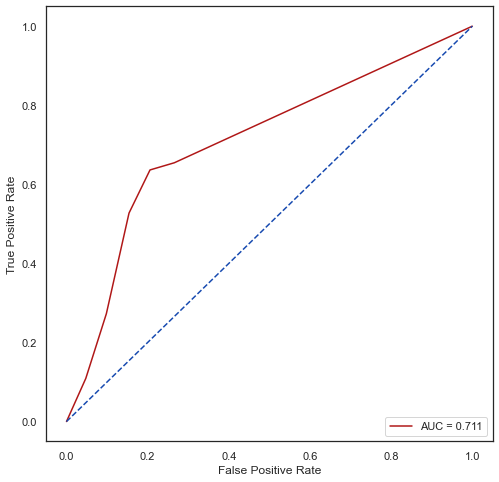

In [47]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(knn_cm, cmap = 'nipy_spectral_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# (TN) True Negatives = 822
# (FP) False Positives = 145
# (FN) False Negatives = 27
# (TP) True Positives = 28

# XGBClassifier

In [48]:
xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 4] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 4] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 4] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 4] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       967
           1       0.21      0.18      0.20        55

    accuracy                           0.92      1022
   macro avg       0.58      0.57      0.58      1022
weighted avg       0.91      0.92      0.92      1022

ROC AUC score: 0.786

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.99
precision: 0.95
recall: 0.95
f1: 0.95


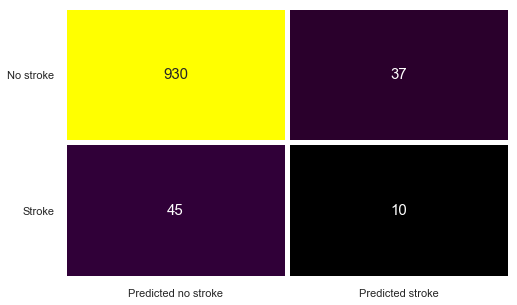

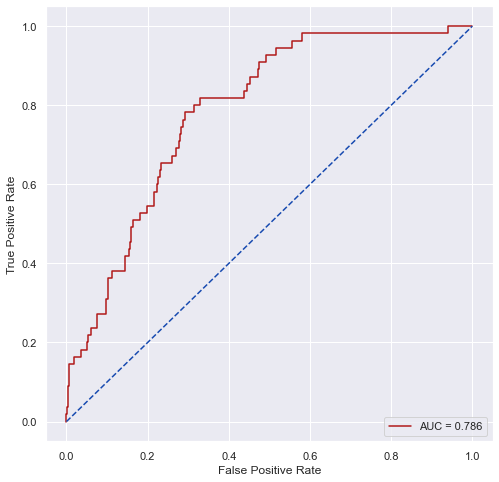

In [49]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'gnuplot', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(12))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
    f_imp3['importance'] = xgb.feature_importances_
    f_imp3 = f_imp3.sort_values('importance', ascending = False)
    f_imp3[0:12].style.background_gradient(cmap = 'Red')

# logic regression

In [50]:
lg = LogisticRegression(random_state = 22)
lg.fit(X_train_balanced, Y_train_balanced)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       967
           1       0.16      0.55      0.24        55

    accuracy                           0.82      1022
   macro avg       0.56      0.69      0.57      1022
weighted avg       0.93      0.82      0.86      1022

ROC AUC score: 0.808

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.891
precision: 0.82
recall: 0.81
f1: 0.81


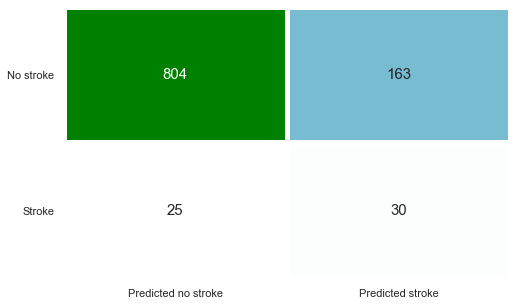

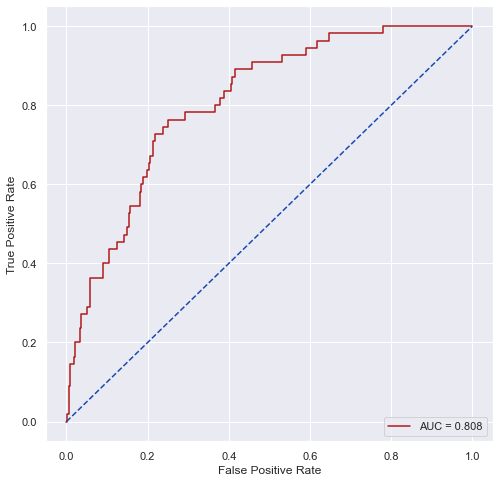

,feature,importance (abs coef)
1,age,3.702864
10,Age_group,0.955521
0,gender,0.761754
6,Residence_type,0.693901
4,ever_married,0.371751
8,bmi,0.288263
7,avg_glucose_level,0.277800
11,agebin,0.254932
9,smoking_status,0.222017
5,work_type,0.195937


In [51]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'ocean_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(12))
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp['importance (abs coef)'] = abs(lg.coef_)[0]
f_imp = f_imp.sort_values('importance (abs coef)', ascending = False)
f_imp[0:13].style.background_gradient(cmap = 'Blues')





# Random Forest Classifier

In [52]:
rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(X_train_balanced, Y_train_balanced)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


              precision    recall  f1-score   support

           0       0.98      0.78      0.87       967
           1       0.15      0.71      0.25        55

    accuracy                           0.77      1022
   macro avg       0.57      0.74      0.56      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC score: 0.822

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.916
precision: 0.78
recall: 0.9
f1: 0.84


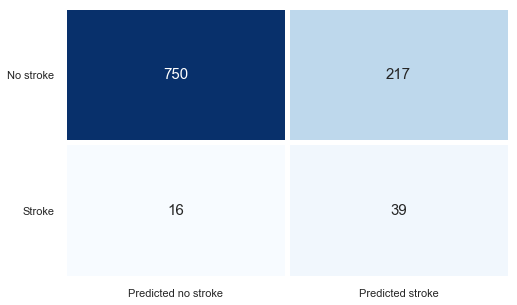

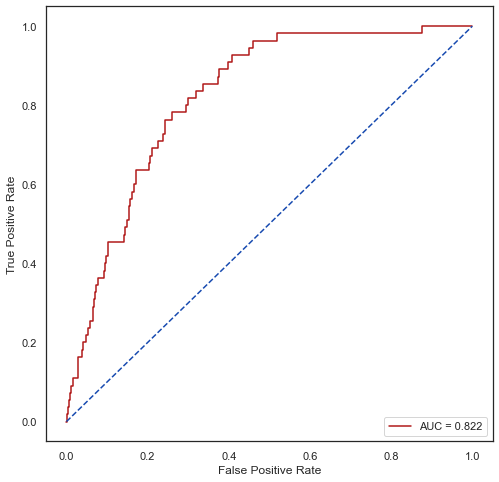

,feature,importance
1,age,0.374810
10,Age_group,0.268431
11,agebin,0.147027
5,work_type,0.058329
7,avg_glucose_level,0.037895
8,bmi,0.033699
3,heart_disease,0.020445
9,smoking_status,0.015919
0,gender,0.013941
4,ever_married,0.011212


In [53]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(12))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i,0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

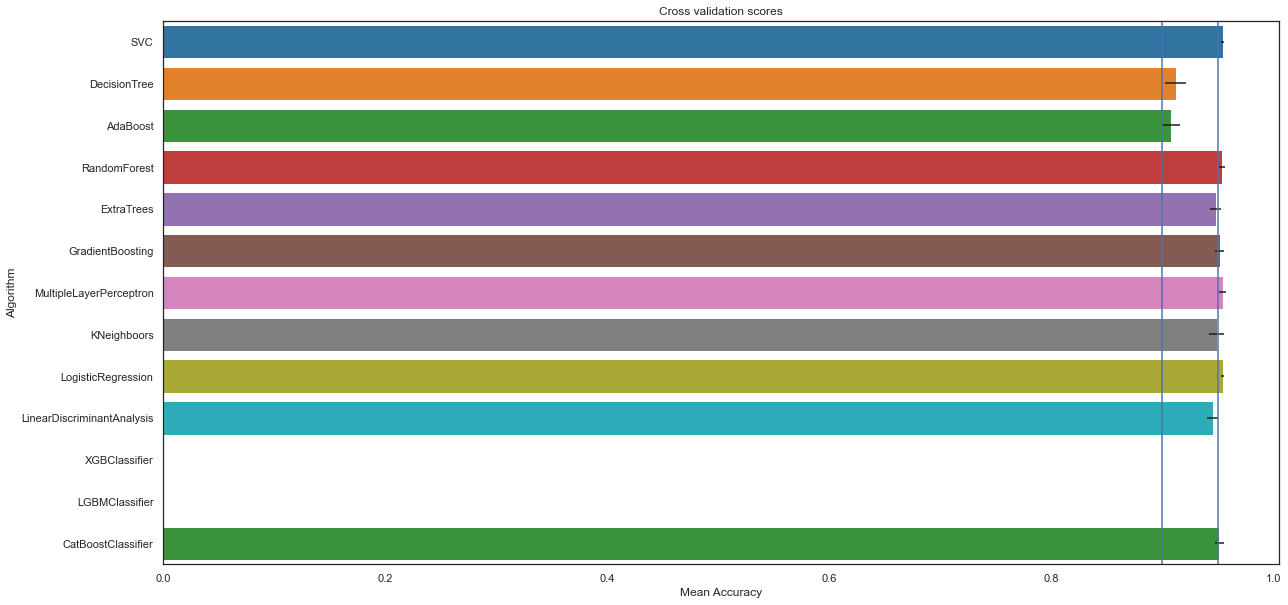

In [54]:
x = data.drop("stroke", axis=1)
y = data["stroke"].values
np.random.seed(42)

models = {"CatBoostClassifier": CatBoostClassifier(silent=True),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(objective= 'binary:logistic')}

def fit_and_score(models, x_train, x_test, y_train, y_test):

    np. random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)

    return model_scores


# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)


kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(n_estimators= 200,objective= 'binary:logistic', random_state = random_state))
classifiers.append(LGBMClassifier(random_state = random_state))
classifiers.append(CatBoostClassifier())


data_results = []
for classifier in classifiers :
    data_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

data_means = []
data_std = []
for data_result in data_results:
    data_means.append(data_result.mean())
    data_std.append(data_result.std())

data_res = pd.DataFrame({"CrossValMeans":data_means,"CrossValerrors": data_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGBClassifier','LGBMClassifier','CatBoostClassifier']})


plt.figure(figsize=(20,10))
g = sns.barplot("CrossValMeans","Algorithm",data = data_res, palette="tab10",orient = "h",**{'xerr':data_std})
plt.axvline(0.95)
plt.axvline(0.90)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

i will be using svc algorithm compare to others as the cross valmeans is higher compare to others, the value error is lesser too

In [55]:
data_res.sort_values(by="CrossValMeans",ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
0,0.954257,0.001088,SVC
6,0.954257,0.003091,MultipleLayerPerceptron
8,0.954257,0.001088,LogisticRegression
3,0.953767,0.002991,RandomForest
5,0.951812,0.004087,GradientBoosting
12,0.951323,0.004143,CatBoostClassifier
7,0.949121,0.006618,KNeighboors
4,0.948140,0.004995,ExtraTrees
9,0.945207,0.004517,LinearDiscriminantAnalysis
1,0.911941,0.009755,DecisionTree


In [56]:
bm = SVC(random_state=random_state)
bm.fit(X_test,Y_test)

y_pred=bm.predict(X_test)
y_true=pd.DataFrame(Y_test)
cr=classification_report(y_true,y_pred,output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.939335,0.0,0.939335,0.469667,0.882350
recall,1.000000,0.0,0.939335,0.500000,0.939335
f1-score,0.968718,0.0,0.939335,0.484359,0.909951
support,960.000000,62.0,0.939335,1022.000000,1022.000000


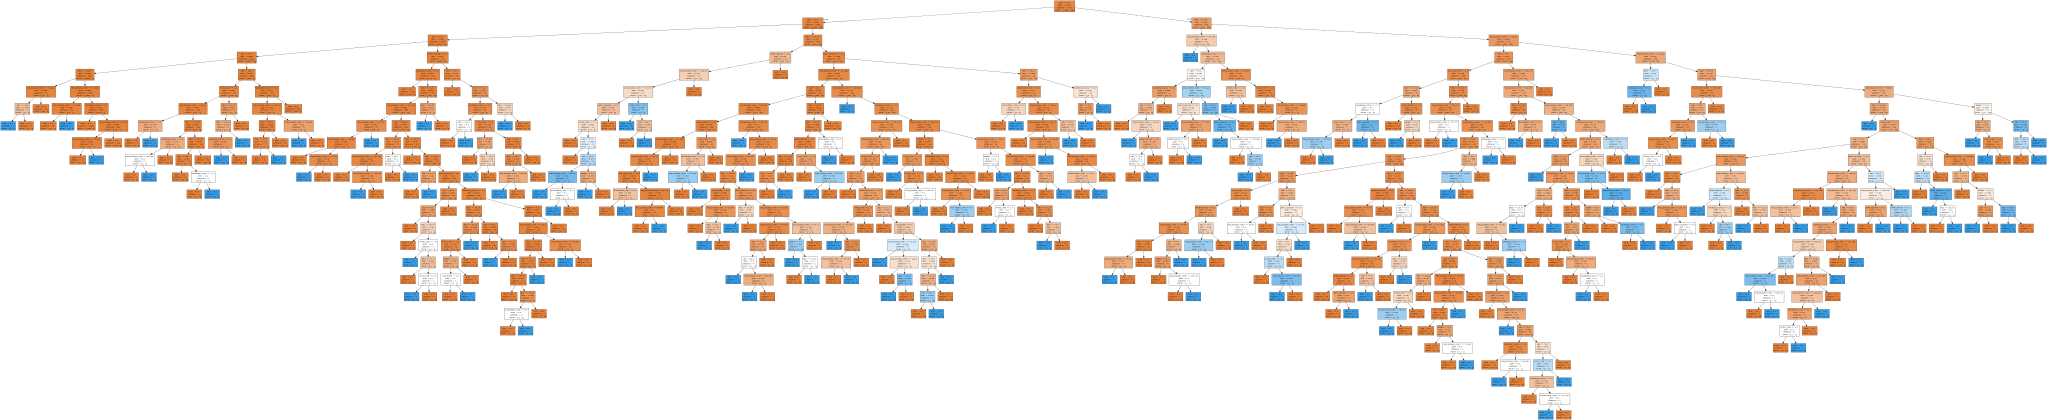

In [57]:

X_train = data.drop("stroke", axis=1)
Y_train = data["stroke"].values


smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)


# DOT data

clf = DecisionTreeClassifier(random_state=1234)
modeling = clf.fit(X_train,Y_train)


feature_names=X_test.columns.values

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  

                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

graph

i choose some model hyperparameters based on my judgment/experience,i then train the model, evaluate its accuracy and start the process again. This loop is repeated until a satisfactory accuracy is scored.

The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.
max_depth = maximum number of levels allowed in each tree.
max_features = maximum number of features considered when splitting a node.
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
min_samples_split = minimum number of samples necessary in a node to cause node splitting.
n_estimators = number of trees in the ensemble.

In [58]:
model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_train,Y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))


[[960   0]
 [ 10  52]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       1.00      0.84      0.91        62

    accuracy                           0.99      1022
   macro avg       0.99      0.92      0.95      1022
weighted avg       0.99      0.99      0.99      1022



In [59]:
X_train = data.drop("stroke", axis=1)
Y_train = data["stroke"].values

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test,predictionforest)
model = RandomForestClassifier(random_state= 101).fit(X_train,Y_train)
predictionforest = model.predict(X_test)
acc1 = accuracy_score(Y_test,predictionforest)
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))


[[960   0]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00        62

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



In Random Search, we create a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters. In this example, I additionally decided to perform Cross-Validation on the training set.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)


In [61]:
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))

[[960   0]
 [  0  62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00        62

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



In Grid Search, we set up a grid of hyperparameters and train/test our model on each of the possible combinations. In order to choose the parameters to use in Grid Search, we can now look at which parameters worked best with Random Search and form a grid based on them to see if we can find a better combination.

Grid Search can be implemented in Python using scikit-learn GridSearchCV() function.

In [62]:
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,Y_train)
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))
acc4 = accuracy_score(Y_test,predictionforest)


Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.7s


[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   10.7s finished


Grid Search is slower compared to Random Search but it can be overall more effective because it can go through the whole search space. Instead, Random Search can be faster fast but might miss some important points in the search space.

create a population of N Machine Learning models with some predefined Hyperparameters, then calculate the accuracy of each model and decide to keep just half of the models (the ones that perform best).generate some offsprings having similar Hyperparameters to the ones of the best models so that to get again a population of N models. At this point, calculate the accuracy of each model and repeat the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In order to implement Genetic Algorithms in Python,use the TPOT Auto Machine Learning library. TPOT is built on the scikit-learn library and it can be used for either regression or classification tasks.

In [63]:
from tpot import TPOTClassifier
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}
               
tpot_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,Y_train) 


Generation 1 - Current best internal CV score: 0.9512720847840019

Generation 2 - Current best internal CV score: 0.9512720847840019

Generation 3 - Current best internal CV score: 0.9512720847840019

Generation 4 - Current best internal CV score: 0.9512720847840019

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=12, min_samples_split=5, n_estimators=10)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2],
                                                                        'max_features': ['auto'],
                                                                        'min_samples_leaf': [4,
                                                                                             12],
                                                                        'min_samples_split': [5,
                                                                                              10],
                                                                        'n_estimators': [10]}},
               cv=4, early_stop=12, generations=4, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity

The report and the best parameters are identified above using Genetic Algorithms.

The overall accuracy of our Random Forest Genetic Algorithm optimized model is shown below.

In [64]:
accuracy = tpot_classifier.score(X_test, Y_test)
print(accuracy)

0.9393346379647749


In [65]:
X=data.drop('stroke', axis=1)
y=data['stroke'].ravel()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [66]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_lr)

0.9510763209393346

In [68]:
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

[[1458    0]
 [  75    0]]


In [69]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

[[1457   72]
 [   1    3]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1529
           1       0.04      0.75      0.08         4

    accuracy                           0.95      1533
   macro avg       0.52      0.85      0.53      1533
weighted avg       1.00      0.95      0.97      1533



With imbalanced data, the accuracy is not a metric that we can take into account because it is based on the the larger part of the target. In other words, this model is very accurate predincting when a people is not having a stroke, which is obviously what we don't need

The poor result in class 1 of the target is expected because of the imbalanced dataset as well as the limited correlation among the variables.

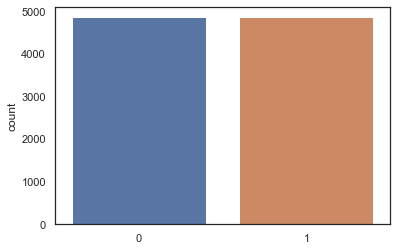

In [70]:
# from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, y)

sns.countplot(x = y_oversampled, data = data)
plt.savefig('stroke_oversampled.png')

In [71]:
# Train again with the new data

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.2, random_state = 42)

In [72]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       975
           1       0.79      0.84      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945

[[760 158]
 [215 812]]


In [74]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(confusion_matrix(dt_pred, y_test))
print(classification_report(dt_pred, y_test))

[[886  74]
 [ 89 896]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       960
           1       0.92      0.91      0.92       985

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [75]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

[[793  24]
 [182 946]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       817
           1       0.98      0.84      0.90      1128

    accuracy                           0.89      1945
   macro avg       0.89      0.90      0.89      1945
weighted avg       0.91      0.89      0.89      1945



In [76]:
#Random forest
rft = RandomForestClassifier(random_state=42)
rft.fit(X_train, y_train)
rft_pred = rft.predict(X_test)
print(confusion_matrix(rft_pred, y_test))
print(classification_report(rft_pred, y_test))

[[922  33]
 [ 53 937]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       955
           1       0.97      0.95      0.96       990

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



So after checking some of the algorithms , i have found that Random Forest has the highest accuracy

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 1000)
log= LogisticRegression()

In [78]:
log.fit(X_train,y_train)


LogisticRegression()

In [79]:
log.score(X_train, y_train)

0.9533128319821079

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 1000)
rft= RandomForestClassifier()

In [92]:
rft.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
rft.score(X_train, y_train)

1.0

https://www.who.int/bulletin/volumes/94/9/16-181636/en/

# THE END